# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.
Instructions

   1. Import the necessary libraries if you are starting a new notebook.
   2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
   3. What should we do with the customer_id column?
   4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:

      numerical_df = customer_df.select_dtypes()
      categorical_df = customer_df.select_dtypes()

   5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
   6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

## Importing Dependecies & Loading the Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
#we should drop the customer feature as it works as a second unnecesary index.
customer_df = customer_df.drop(columns=['Customer'])
customer_df.head(3) #sanity check

## Numerical & Categorical Variables

In [16]:
numerical_df = customer_df.select_dtypes(include='number') 
categorical_df = customer_df.select_dtypes(exclude='number')

numerical_df.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247


In [15]:
categorical_df.head(3)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


### Vizualization of Categorical Variables

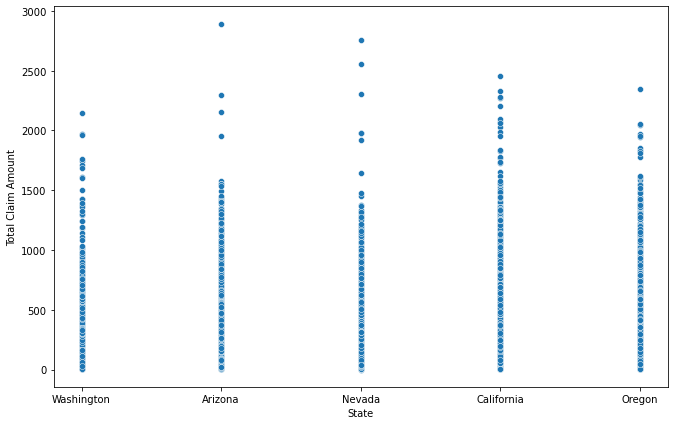

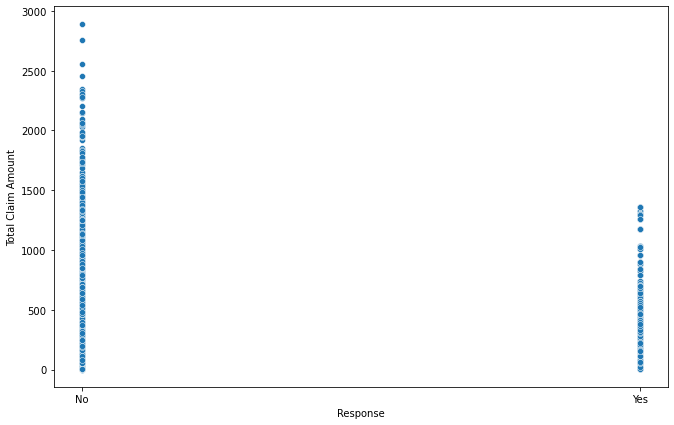

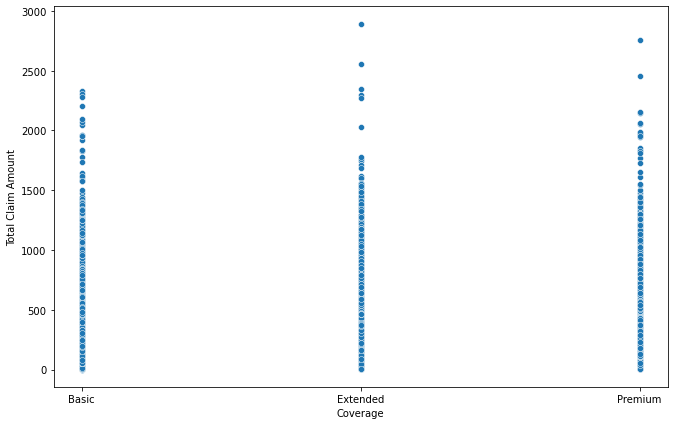

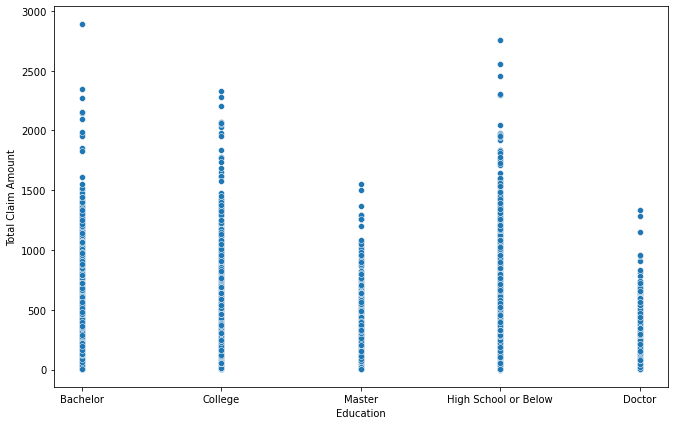

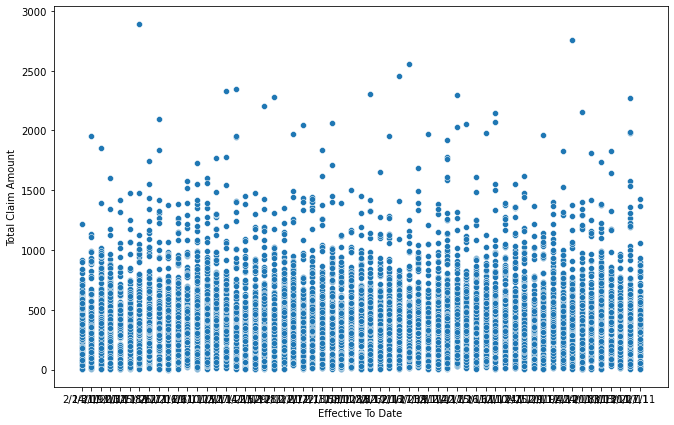

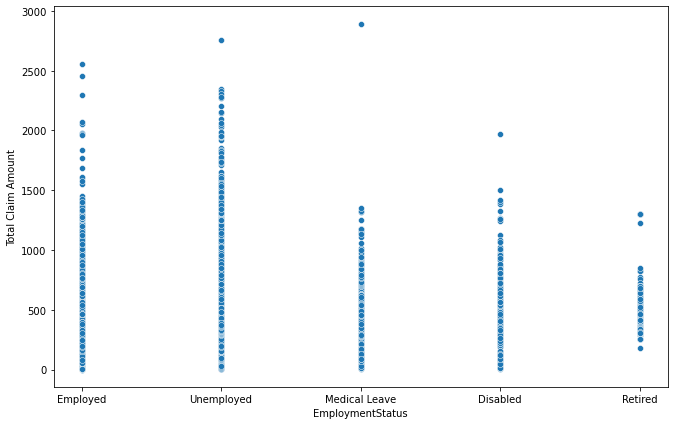

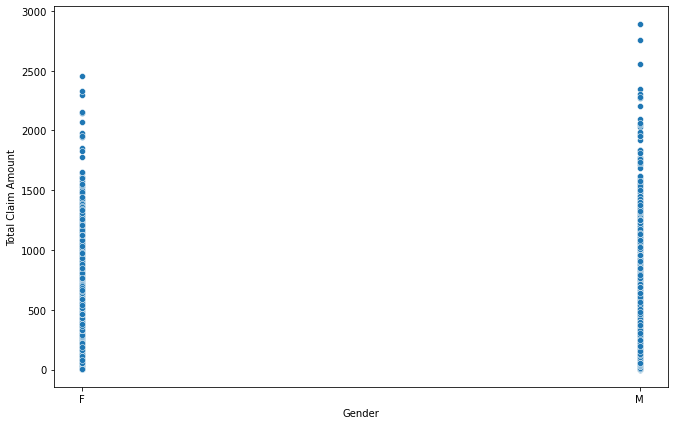

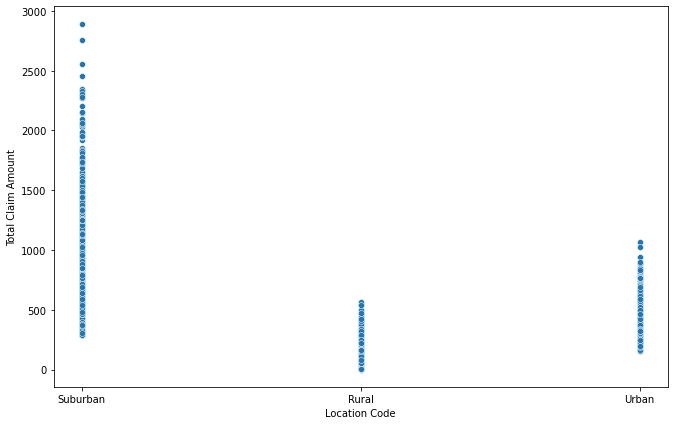

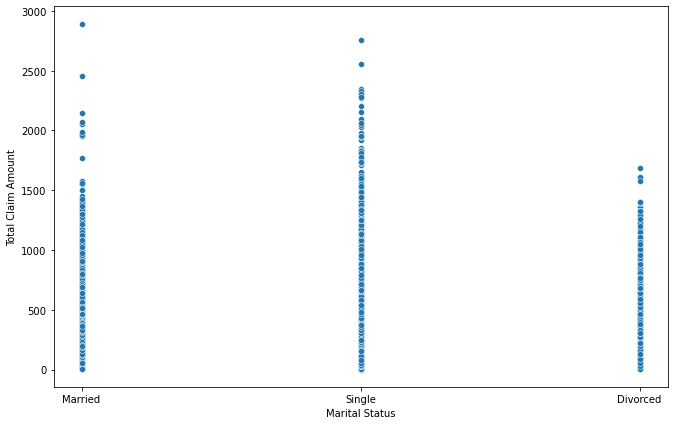

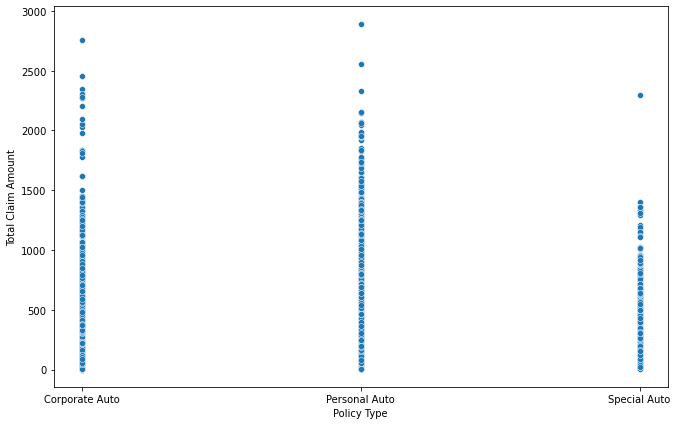

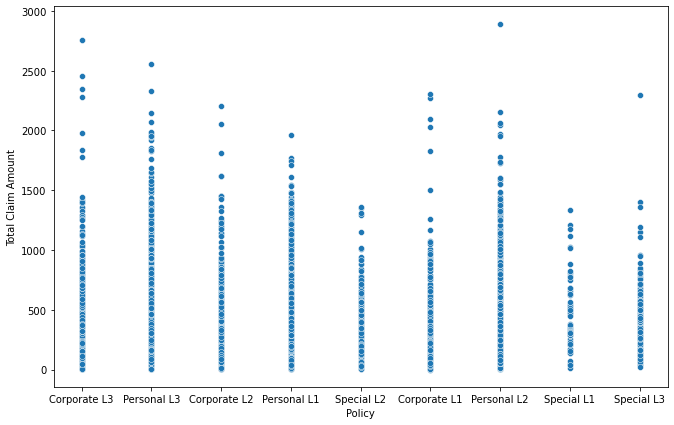

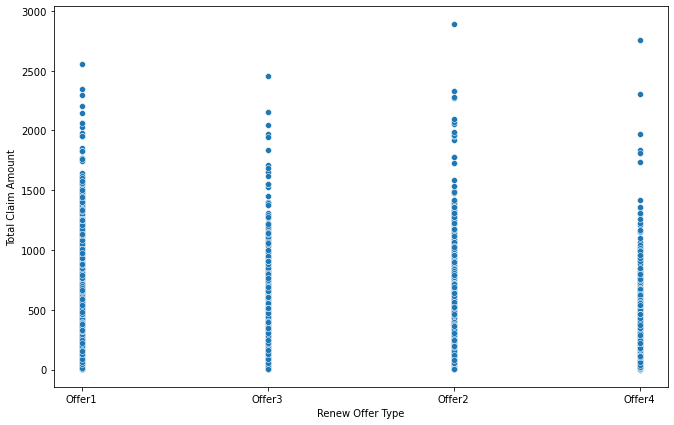

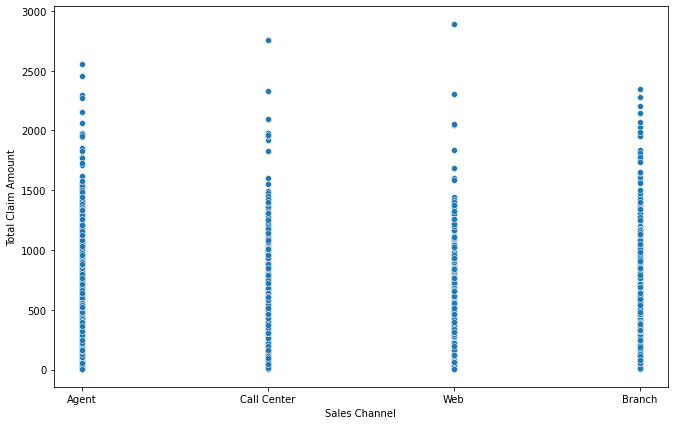

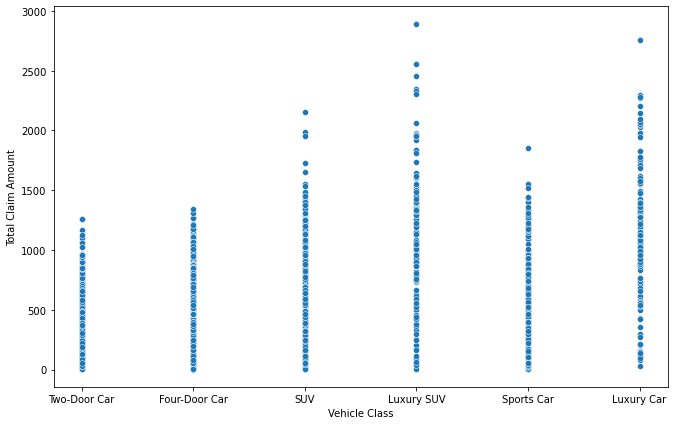

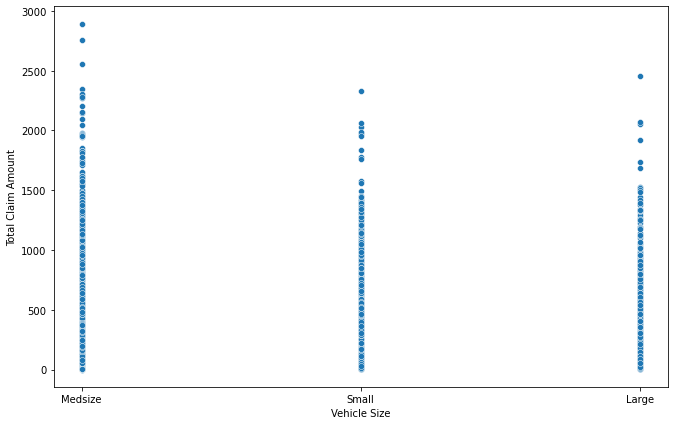

In [20]:
for columns in categorical_df:
    plt.figure(figsize=(11,7))
    sns.scatterplot(data=customer_df, x=categorical_df[columns], y=numerical_df['Total Claim Amount'])
    plt.show()

**Comment:** We can draw the following conclusions from the above scatterplots:
   * 1. Most total claim amount seem to come from California. By exception the highest amounts claimed are from Arizona and Nevada.
   * 2. The outstanding majority of the highest total claim amount is related to a no response.
   * 3. All three policies seem quite similar with extended coverage scoring the highest total amount claim point.
   * 4. Master and doctorate and holders are negatively related to total claim amount.
   * 5. Unemployed customers are accounting for a large chunk of the total claim amount.
   * 6. Males seem to score a higher total claim amount. #crash_gender_stereotypes
   * 7. Suburban areas seem to be the most profitable.
   * 8. Single people seem to be the most profitable - althought the highest total claim amount goes to married customers.
   * 9. The special auto policies are the least profitable (interesting since we know from the previous lab the their number is really small).
   * 10. Something similar can be said about L3 corporate and L3 personal since they score very high total claim amount although they are not what most customers have. 
   * 11. Offer 1 seems to e the most profitable but the highest scoring offer is offer 2 with almost 3000 total claim amount.
   * 12. Interesting that although web has the smallest count it has the highest total claim amount data point. Branch seems to be consistently profitable.
   * 13. Luxury car and luxury SUV are the most profitable despite their low numbers amongst customers.
   * 14. Medium-sized cars are the most profitable in terms of total claim amount. Interestingly, small and large cars score quite similar.

### Further Examination of Categorical Variables

In [27]:
for column in categorical_df:
    print('\033[1m', column)
    print('\033[0m', categorical_df[column].value_counts(dropna=False, normalize=True))

 State
 California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: State, dtype: float64
 Response
 No     0.856799
Yes    0.143201
Name: Response, dtype: float64
 Coverage
 Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: Coverage, dtype: float64
 Education
 Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: Education, dtype: float64
 Effective To Date
 1/10/11    0.021349
1/27/11    0.021239
2/14/11    0.020363
1/26/11    0.019816
1/17/11    0.019707
1/19/11    0.019597
1/31/11    0.019488
1/3/11     0.019488
1/20/11    0.018940
2/26/11    0.018502
1/28/11    0.018502
2/19/11    0.018393
1/5/11     0.018283
2/27/11    0.018283
1/11/11    0.018174
2/4/11     0.017955
2/10/11    0.017626
2/28/11    0.017626
1/2/11     0.017517
1/21/11    0.017517
1/29/11    0.017517
2/22/11    0.017298
2

**Comment:** We could use some of this information above to normalize the data in case we wanted to build a model that includes any imbalanced features. If we're interested in vehicle size or class for instance it's good to know that medium size cars account for 70% of our data and four door car for over 50%. That could create certain normality issues in case we use a classification or regression task along the way.